In [1]:
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\DELL\Documents\Data\Data.csv") # Importing Assignment Data

In [4]:
df1=pd.read_csv(r"C:\Users\DELL\Documents\Data\Delivery_Partners_Data.csv") # Import Delivery Partner Data

In [5]:
df.head(10) # assignment data

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG
0,2745,180976,2021-02-13 03:08:24.000,2021-02-13 03:38:26.000,0,NaN,2021-02-13 03:01:11.686,2021-02-13 03:43:26.000,320.9,320.0,314.0,1810.0,63,2021-02-13 03:07:34.000,373.0,37.377569,72.832560
1,9462,280243,2021-02-14 05:06:40.000,2021-02-14 05:31:04.000,0,NaN,2021-02-14 04:54:25.832,2021-02-14 05:36:04.000,516.8,342.5,451.0,3210.0,27,2021-02-14 05:06:40.000,373.0,37.380613,72.796909
2,14071,339813,2021-02-15 02:22:40.000,2021-02-15 02:44:02.000,0,NaN,2021-02-15 02:01:17.864,2021-02-15 02:49:02.000,459.5,418.7,443.0,2910.0,57,2021-02-15 02:22:35.000,373.0,37.372032,72.805871
3,14442,1315348,2021-02-15 03:01:25.000,2021-02-15 03:15:02.000,0,NaN,2021-02-15 02:43:41.129,2021-02-15 03:20:02.000,376.4,332.9,367.3,3210.0,41,2021-02-15 03:00:28.000,373.0,37.371380,72.819992
4,14515,1186729,2021-02-15 03:12:24.000,2021-02-15 03:50:24.000,0,NaN,2021-02-15 02:48:17.074,2021-02-15 03:55:24.000,414.5,334.1,413.2,3210.0,13,2021-02-15 03:12:09.000,373.0,37.369925,72.826764
5,14974,180976,2021-02-15 03:36:24.000,2021-02-15 03:54:31.000,0,NaN,2021-02-15 03:30:24.093,2021-02-15 03:59:31.000,370.4,414.5,378.2,3710.0,52,2021-02-15 03:36:19.000,373.0,37.368782,72.809458
6,15207,946929,2021-02-15 04:32:24.000,2021-02-15 04:47:49.000,0,NaN,2021-02-15 03:46:39.529,2021-02-15 04:52:49.000,410.3,320.0,376.8,3160.0,69,2021-02-15 04:32:07.000,373.0,37.386779,72.806458
7,17364,1182596,2021-02-15 18:50:40.000,2021-02-15 19:11:16.000,0,NaN,2021-02-15 18:48:57.460,2021-02-15 19:16:16.000,399.8,389.3,382.8,2410.0,9,2021-02-15 18:50:09.000,373.0,37.370959,72.834112
8,20180,977070,2021-02-16 03:07:54.000,2021-02-16 03:28:29.000,0,NaN,2021-02-16 03:05:04.748,2021-02-16 03:33:29.000,365.0,347.0,386.2,2660.0,7,2021-02-16 03:07:53.000,373.0,37.368161,72.794676
9,20240,977070,2021-02-16 03:28:40.000,2021-02-16 03:43:28.000,0,NaN,2021-02-16 03:10:33.130,2021-02-16 03:48:28.000,392.6,473.9,385.5,3460.0,5,2021-02-16 03:28:16.000,373.0,37.365348,72.830327


In [6]:
df1.head(10) # data of delivery parther

,DE_ID,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_JOINING_DATE,DE_ZONE_ID
0,141533,06:42,37.390427,72.849424,2019-09-20,372
1,235942,08:42,37.372289,72.885341,2020-03-15,372
2,973234,06:42,37.410268,72.853610,2018-12-21,375
3,973473,05:42,37.397067,72.872533,2018-12-21,624
4,1016546,06:42,37.425545,72.895137,2019-01-11,668
5,130629,05:42,37.373127,72.806568,2019-09-10,624
6,148633,01:42,37.406343,72.836286,2019-09-28,375
7,356712,11:42,37.372636,72.844556,2020-08-09,374
8,595376,05:42,37.393238,72.840244,2018-05-02,372
9,719813,11:42,37.408971,72.816984,2018-07-27,375


In [7]:
# creating new feature exp, saying experience of that delivery partner

df1['exp']=datetime.datetime.today()-pd.to_datetime(df1['DE_JOINING_DATE']) 

In [8]:
df1['exp']=df1['exp'].apply(lambda x:x.days) # converting experience to days

In [9]:
df1.head(10) # data of delivery parther

,DE_ID,SHIFT_END_TIME,DE_HOME_LAT,DE_HOME_LNG,DE_JOINING_DATE,DE_ZONE_ID,exp
0,141533,06:42,37.390427,72.849424,2019-09-20,372,829
1,235942,08:42,37.372289,72.885341,2020-03-15,372,652
2,973234,06:42,37.410268,72.853610,2018-12-21,375,1102
3,973473,05:42,37.397067,72.872533,2018-12-21,624,1102
4,1016546,06:42,37.425545,72.895137,2019-01-11,668,1081
5,130629,05:42,37.373127,72.806568,2019-09-10,624,839
6,148633,01:42,37.406343,72.836286,2019-09-28,375,821
7,356712,11:42,37.372636,72.844556,2020-08-09,374,505
8,595376,05:42,37.393238,72.840244,2018-05-02,372,1335
9,719813,11:42,37.408971,72.816984,2018-07-27,375,1249


In [10]:
ids={}  # zone ids of that delivery partner
for i in range(df1.shape[0]):
    ids[df1['DE_ID'][i]]=df1['DE_ZONE_ID'][i]
    
end_times={} # shift ending timings of delivery partner
for i in range(df1.shape[0]):
    end_times[df1['DE_ID'][i]]=df1['SHIFT_END_TIME'][i]
    
experiences={} # experience of that delivery partner
for i in range(df1.shape[0]):
    experiences[df1['DE_ID'][i]]=df1['exp'][i]

In [11]:
df['DE_ZONE_ID']=df['DE_ID'].apply(lambda x: ids[x])

In [12]:
df['SHIFT_END_TIME']=df['DE_ID'].apply(lambda x: end_times[x])

In [13]:
df['exp_in_days']=df['DE_ID'].apply(lambda x: experiences[x])

In [14]:
df.head(5)

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,LAST_MILE_TIME_PREDICTED,PAYOUT_MADE_TO_DE,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,DE_ZONE_ID,SHIFT_END_TIME,exp_in_days
0,2745,180976,2021-02-13 03:08:24.000,2021-02-13 03:38:26.000,0,NaN,2021-02-13 03:01:11.686,2021-02-13 03:43:26.000,320.9,320.0,314.0,1810.0,63,2021-02-13 03:07:34.000,373.0,37.377569,72.832560,373,05:42,794
1,9462,280243,2021-02-14 05:06:40.000,2021-02-14 05:31:04.000,0,NaN,2021-02-14 04:54:25.832,2021-02-14 05:36:04.000,516.8,342.5,451.0,3210.0,27,2021-02-14 05:06:40.000,373.0,37.380613,72.796909,372,06:42,587
2,14071,339813,2021-02-15 02:22:40.000,2021-02-15 02:44:02.000,0,NaN,2021-02-15 02:01:17.864,2021-02-15 02:49:02.000,459.5,418.7,443.0,2910.0,57,2021-02-15 02:22:35.000,373.0,37.372032,72.805871,372,05:42,520
3,14442,1315348,2021-02-15 03:01:25.000,2021-02-15 03:15:02.000,0,NaN,2021-02-15 02:43:41.129,2021-02-15 03:20:02.000,376.4,332.9,367.3,3210.0,41,2021-02-15 03:00:28.000,373.0,37.371380,72.819992,372,06:42,939
4,14515,1186729,2021-02-15 03:12:24.000,2021-02-15 03:50:24.000,0,NaN,2021-02-15 02:48:17.074,2021-02-15 03:55:24.000,414.5,334.1,413.2,3210.0,13,2021-02-15 03:12:09.000,373.0,37.369925,72.826764,372,05:42,997


Creating a new column, by adding firstmile and lastmile, making it total distance delivery partner needs to travel

In [15]:
df['dist_emp']=df['FIRSTMILE_DISTANCE']+df['LASTMILE_DISTANCE']

In [16]:
# helper function to print values on the chart

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# EDA

Q1) How much experience of the delivery partner relates with rejection of the order. Does a less experienced delivery partner reject more orders??

In [17]:
median_experience_of_rejection=df[df['reject_ind']==1]['exp_in_days'].median()
median_experience_of_acceptance=df[df['reject_ind']==0]['exp_in_days'].median()

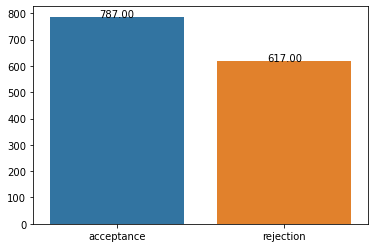

In [18]:
fig, ax = plt.subplots(1, 1)
sns.barplot(['acceptance','rejection'],[median_experience_of_acceptance,median_experience_of_rejection])
show_values_on_bars(ax)

The median experience of a delivery guy in rejection case is 617, where as in acceptance case is 787

We can clearly see that delivery partners with less experience are more likely to reject orders than more experienced ones

Q2) How shift time relate with rejection of orders??

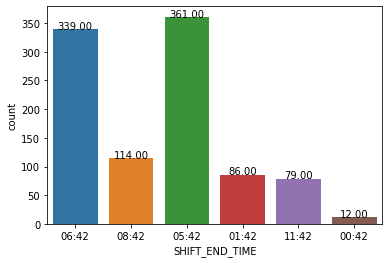

In [19]:
fig, ax = plt.subplots(1, 1) 
sns.countplot(x='SHIFT_END_TIME',data=df1) # This plot shows the shift timing of all the de's
show_values_on_bars(ax)

Most delivery partners (361) work in shift end time of 5:42. The least number of delivery partners (12) work till 00:42

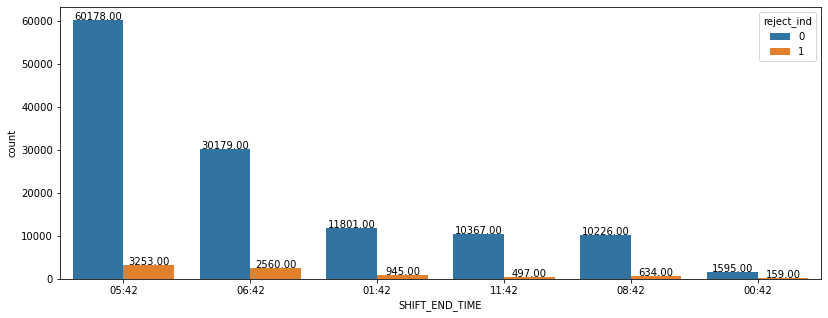

In [20]:
fig = plt.figure(figsize=(30, 5))
ax=fig.add_subplot(121)
sns.countplot(x='SHIFT_END_TIME',data=df,hue='reject_ind') # This plot shows the shifts of de's varies with orders
show_values_on_bars(ax)

In shift time of 5:42 there are 60,178 accepted orders and only 3253 rejections. But in shift 6:42 rejected orders are almost near (2560) to the former even though accepted orders are less.


So we can conclude that there is a high probability of rejection for delivery partners working in shift 6:42.

Q3) Is there any relation between the zone of the order and the rejection. Are the orders of a certain region rejected more??

posx and posy should be finite values
posx and posy should be finite values


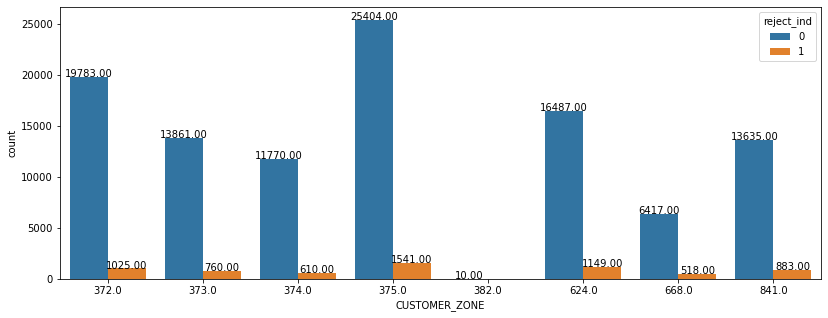

In [21]:
# This plot shows the number of accepted/rejected orders in that particular shift

fig = plt.figure(figsize=(30, 5))
ax=fig.add_subplot(121)
sns.countplot(x='CUSTOMER_ZONE',data=df,hue='reject_ind') 
show_values_on_bars(ax)

In [22]:
for i in df['CUSTOMER_ZONE'].value_counts().index:
    if(i==np.nan):
        continue
    data=df[df['CUSTOMER_ZONE']==i]
    zero=len(data[data['reject_ind']==0])
    one=len(data[data['reject_ind']==1])
    print('Customer zone no: ',i)
    print('Percentage of rejected orders: ',one/(one+zero))
    print()

Customer zone no:  375.0
Percentage of rejected orders:  0.05719057339023938

Customer zone no:  372.0
Percentage of rejected orders:  0.04925990003844675

Customer zone no:  624.0
Percentage of rejected orders:  0.06515082785212066

Customer zone no:  373.0
Percentage of rejected orders:  0.05198002872580535

Customer zone no:  841.0
Percentage of rejected orders:  0.060821049731367954

Customer zone no:  374.0
Percentage of rejected orders:  0.049273021001615507

Customer zone no:  668.0
Percentage of rejected orders:  0.07469358327325162

Customer zone no:  382.0
Percentage of rejected orders:  0.0



We can see percentage of rejected orders is same in all zones. So we can conclude that there is no relation between rejection of orders and the zone in which orders were placed, and the rejections are equally likely in all zones

Q4) Does rejecting the order depends on the distance delivery partner needs to travel. Does traveling far distance makes the delivery partner reject the order?

In [23]:
mean_distance_for_rejection=df[df['reject_ind']==1]['dist_emp'].mean()
mean_distance_for_acceptance=df[df['reject_ind']==0]['dist_emp'].mean()

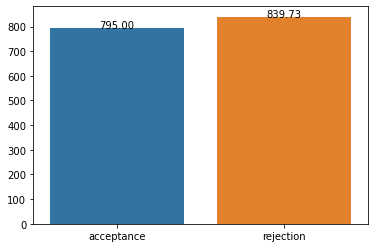

In [24]:
fig, ax = plt.subplots(1, 1)
sns.barplot(['acceptance','rejection'],[mean_distance_for_acceptance,mean_distance_for_rejection])
show_values_on_bars(ax)

As the distances of both accepted case and rejected case does'nt vary by a huge margin, We can't conclude that delivery partner rejects
the order based on the distance he needs to travel

Q5) How much rejection of order depends on the day of the week. Are delivery partners rejecting more orders on weekends??

In [25]:
df['day_of_week']=pd.to_datetime(df['ASSIGNMENT_START_TIME']).dt.dayofweek

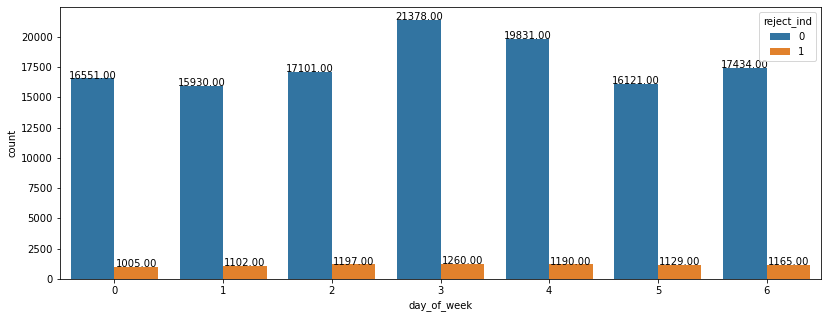

In [26]:
fig = plt.figure(figsize=(30, 5))
ax=fig.add_subplot(121)
sns.countplot(x='day_of_week',data=df,hue='reject_ind')
show_values_on_bars(ax)

# 0-Monday, 1-Tuesday, 2-Wednesday ...  6-Sunday

From the above graph, we can see that orders rejected are almost evenly distributed on all days of the week. So we can't say that a delivery partner reject more orders on weekends than weekdays, which is very good.

Q6) Which rejection type is more frequent??

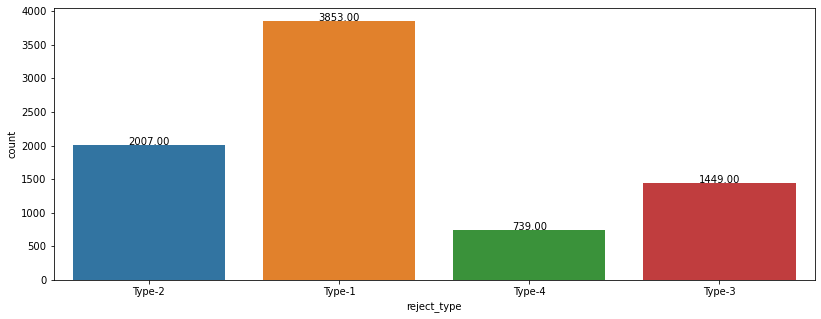

In [27]:
fig = plt.figure(figsize=(30, 5))
ax=fig.add_subplot(121)
sns.countplot(x='reject_type',data=df)
show_values_on_bars(ax)

We can clearly see that Type-1 Rejection is very much high in number, compared to others. So we can aim to reduce those Type-1 rejections.

Q7) Is there are relation between Type of Rejection and the zone of the Customer??

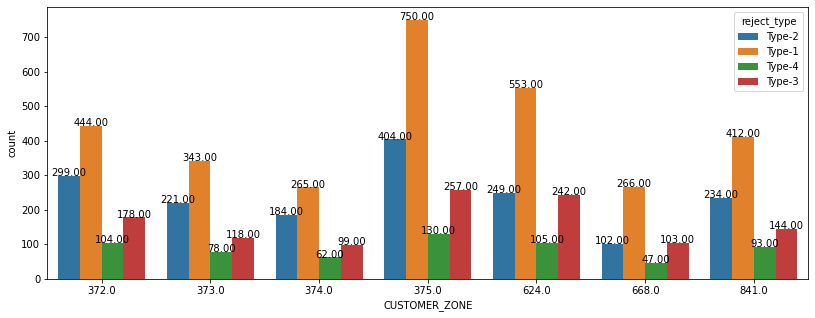

In [28]:
fig = plt.figure(figsize=(30, 5))
ax=fig.add_subplot(121)
sns.countplot(x='CUSTOMER_ZONE',data=df.dropna(subset=['CUSTOMER_ZONE','reject_type']),hue='reject_type')
show_values_on_bars(ax)

In every zone, Type-1 Rejection is more common and Type-4 rejections are very rare. We can also observe the order of rejections in every zone i.e 
Type 1 > Type 2 > Type 3 > Type 4

# Data Preprocessing and Data Cleaning

First lets inspect what features we have till now and preprocess the data

In [29]:
df.columns

Index(['ORDER_ID', 'DE_ID', 'ASSIGNMENT_START_TIME', 'ASSIGNMENT_END_TIME',
       'reject_ind', 'reject_type', 'PLACED_TIME', 'DELIVERED_TIME',
       'LASTMILE_DISTANCE', 'FIRSTMILE_DISTANCE', 'LAST_MILE_TIME_PREDICTED',
       'PAYOUT_MADE_TO_DE', 'NUM_PING_COUNT_LAST10MIN',
       'LAST_PING_TIME_LAST10MIN', 'CUSTOMER_ZONE', 'CUSTOMER_LAT',
       'CUSTOMER_LNG', 'DE_ZONE_ID', 'SHIFT_END_TIME', 'exp_in_days',
       'dist_emp', 'day_of_week'],
      dtype='object')

In [30]:
df.tail(10)

,ORDER_ID,DE_ID,ASSIGNMENT_START_TIME,ASSIGNMENT_END_TIME,reject_ind,reject_type,PLACED_TIME,DELIVERED_TIME,LASTMILE_DISTANCE,FIRSTMILE_DISTANCE,...,NUM_PING_COUNT_LAST10MIN,LAST_PING_TIME_LAST10MIN,CUSTOMER_ZONE,CUSTOMER_LAT,CUSTOMER_LNG,DE_ZONE_ID,SHIFT_END_TIME,exp_in_days,dist_emp,day_of_week
132384,105662,273619,2021-03-02 22:09:20.000,2021-03-02 22:26:30.000,0,NaN,2021-03-02 22:07:59.869,2021-03-02 22:31:30.000,363.2,368.3,...,22,2021-03-02 22:09:02.000,374.0,37.359144,72.852351,374,05:42,594,731.5,1
132385,107834,287059,2021-03-03 03:36:21.000,2021-03-03 04:03:31.000,0,NaN,2021-03-03 03:27:12.582,2021-03-03 04:08:31.000,460.4,355.7,...,37,2021-03-03 03:36:20.000,374.0,37.366997,72.841034,374,06:42,580,816.1,2
132386,107834,395956,2021-03-03 03:33:21.000,2021-03-03 03:36:20.000,1,Type-4,2021-03-03 03:27:12.582,2021-03-03 04:08:31.000,460.4,383.6,...,45,2021-03-03 03:32:40.000,374.0,37.366997,72.841034,372,06:42,467,844.0,2
132387,108759,977179,2021-03-03 04:31:07.000,2021-03-03 05:00:34.000,0,NaN,2021-03-03 04:24:44.475,2021-03-03 05:05:34.000,497.3,324.8,...,34,2021-03-03 04:30:51.000,374.0,37.371239,72.858420,374,08:42,1100,822.1,2
132388,111843,1201050,2021-03-03 22:55:20.000,2021-03-03 23:44:49.000,0,NaN,2021-03-03 22:54:31.368,2021-03-03 23:49:49.000,473.0,353.0,...,11,2021-03-03 22:54:38.000,374.0,37.365303,72.858267,372,05:42,990,826.0,2
132389,116618,1273445,2021-03-04 07:07:20.000,2021-03-04 07:37:54.000,0,NaN,2021-03-04 06:55:15.466,2021-03-04 07:42:54.000,404.6,434.6,...,28,2021-03-04 07:06:25.000,374.0,37.365616,72.835463,372,11:42,958,839.2,3
132390,116618,234637,2021-03-04 07:05:20.000,2021-03-04 07:07:19.000,1,Type-1,2021-03-04 06:55:15.466,2021-03-04 07:42:54.000,404.6,444.8,...,63,2021-03-04 07:04:40.000,374.0,37.365616,72.835463,375,05:42,679,849.4,3
132391,118004,1018931,2021-03-04 20:47:34.000,2021-03-04 21:07:35.000,0,NaN,2021-03-04 20:41:54.521,2021-03-04 21:12:35.000,475.7,334.7,...,8,2021-03-04 20:45:39.000,374.0,37.362292,72.861723,372,05:42,1081,810.4,3
132392,119366,1180245,2021-03-04 23:37:20.000,2021-03-05 00:01:34.000,0,NaN,2021-03-04 23:35:22.194,2021-03-05 00:06:34.000,326.6,392.9,...,28,2021-03-04 23:37:14.000,374.0,37.365457,72.862098,372,01:42,1001,719.5,3
132393,121027,370946,2021-03-05 02:29:21.000,2021-03-05 02:52:50.000,0,NaN,2021-03-05 02:28:08.182,2021-03-05 02:57:50.000,429.5,337.1,...,27,2021-03-05 02:28:17.000,374.0,37.371853,72.855686,374,05:42,493,766.6,4


ORDER_ID AND DE_ID are the unique identifiers of the rows, so they have to be removed

In [31]:
df=df.drop(['ORDER_ID','DE_ID'],axis=1)

Convert LAST_PING_TIME_LAST10MIN into PING_TIME_DIFFERENCE which is the difference between ASSIGNMENT_START_TIME and LAST_PING_TIME_LAST10MIN

In [32]:
df['LAST_PING_TIME_LAST10MIN'] =pd.to_datetime(df['LAST_PING_TIME_LAST10MIN'])
df['ASSIGNMENT_START_TIME'] =pd.to_datetime(df['ASSIGNMENT_START_TIME'])
df['ping_time_difference_in_sec']=df['ASSIGNMENT_START_TIME']-df['LAST_PING_TIME_LAST10MIN']
df['ping_time_difference_in_sec']=df['ping_time_difference_in_sec'].apply(lambda x: x.seconds)
df=df.drop(['LAST_PING_TIME_LAST10MIN'],axis=1)

Convert ASSIGNMENT_START_TIME into two columns "day_of_week" and "hour_of_the_day" and dropping  ASSIGNMENT_START_TIME

In [33]:
df['day_of_week']=pd.to_datetime(df['ASSIGNMENT_START_TIME']).dt.dayofweek
df['hour_of_the_day']=pd.to_datetime(df['ASSIGNMENT_START_TIME']).dt.hour
df=df.drop(['ASSIGNMENT_START_TIME'],axis=1)

DROP feature PLACED_TIME because the hour of placed time and hour of assignment are almost the same.

In [34]:
df=df.drop(['PLACED_TIME'],axis=1)

 DROP ASSIGNMENT_END_TIME, DELIVERED_TIME as well because they don't add any meaning for delivery partner to accept an order or not

In [35]:
df=df.drop(['ASSIGNMENT_END_TIME','DELIVERED_TIME'],axis=1)

DROP PAYOUT_MADE_TO_DE feature that is the feature that comes after successfully delivering the order. Moreover if PAYOUT_MADE_TO_DE==0 then reject_ind will always be 1.

In [36]:
df=df.drop(['PAYOUT_MADE_TO_DE'],axis=1)

Create a new feature of whether CUSTOMER_ZONE and DE_ZONE are same or not

In [37]:
df['zone_same_or_not']=(df['CUSTOMER_ZONE']==df['DE_ZONE_ID']).apply(lambda x: 1 if x else 0)
df=df.drop(['CUSTOMER_ZONE','DE_ZONE_ID'],axis=1)

DROP feature LASTMILE_DISTANCE and FIRSTMILE_DISTANCE as we already created new feature dist_emp which is sum of both the features

In [38]:
df=df.drop(['LASTMILE_DISTANCE','FIRSTMILE_DISTANCE'],axis=1)

DROP feature CUSTOMER_LAT, CUSTOMER_LNG as there is a feature dist_emp that has information about distance

In [39]:
df=df.drop(['CUSTOMER_LAT','CUSTOMER_LNG'],axis=1)

Lastly, we one-hot encode the SHIFT_END_TIME feature

In [40]:
df=pd.concat([df,pd.get_dummies(df['SHIFT_END_TIME'],drop_first=True)],axis=1)
df=df.drop(['SHIFT_END_TIME'],axis=1)

Dropping reject_type column

In [41]:
df=df.drop(['reject_type'],axis=1)

Inspect null values

In [42]:
df.isna().sum()

reject_ind                       0
LAST_MILE_TIME_PREDICTED         0
NUM_PING_COUNT_LAST10MIN         0
exp_in_days                      0
dist_emp                       156
day_of_week                      0
ping_time_difference_in_sec      0
hour_of_the_day                  0
zone_same_or_not                 0
01:42                            0
05:42                            0
06:42                            0
08:42                            0
11:42                            0
dtype: int64

In [43]:
df['dist_emp'].fillna(df['dist_emp'].mean(),inplace=True)

In [44]:
df.isna().sum()

reject_ind                     0
LAST_MILE_TIME_PREDICTED       0
NUM_PING_COUNT_LAST10MIN       0
exp_in_days                    0
dist_emp                       0
day_of_week                    0
ping_time_difference_in_sec    0
hour_of_the_day                0
zone_same_or_not               0
01:42                          0
05:42                          0
06:42                          0
08:42                          0
11:42                          0
dtype: int64

Final data frame

In [45]:
df.tail(10)

,reject_ind,LAST_MILE_TIME_PREDICTED,NUM_PING_COUNT_LAST10MIN,exp_in_days,dist_emp,day_of_week,ping_time_difference_in_sec,hour_of_the_day,zone_same_or_not,01:42,05:42,06:42,08:42,11:42
132384,0,360.0,22,594,731.5,1,18,22,1,0,1,0,0,0
132385,0,458.0,37,580,816.1,2,1,3,1,0,0,1,0,0
132386,1,458.0,45,467,844.0,2,41,3,0,0,0,1,0,0
132387,0,371.3,34,1100,822.1,2,16,4,1,0,0,0,1,0
132388,0,409.7,11,990,826.0,2,42,22,0,0,1,0,0,0
132389,0,371.8,28,958,839.2,3,55,7,0,0,0,0,0,1
132390,1,371.8,63,679,849.4,3,40,7,0,0,1,0,0,0
132391,0,413.2,8,1081,810.4,3,115,20,0,0,1,0,0,0
132392,0,317.7,28,1001,719.5,3,6,23,0,1,0,0,0,0
132393,0,396.8,27,493,766.6,4,64,2,1,0,1,0,0,0


Now let's see the distribution of both the classes

In [46]:
df['reject_ind'].value_counts()
# We can see that there is a huge imbalance in distribution of the classes

0    124346
1      8048
Name: reject_ind, dtype: int64

Splitting our data into train and test data

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop("reject_ind",axis=1),df['reject_ind'],test_size=0.1,random_state=20)

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Model training

In [61]:
model=RandomForestClassifier(n_jobs=-1,class_weight='balanced',min_samples_split=10,random_state=42)

In [62]:
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=10, n_jobs=-1,
                       random_state=42)

In [63]:
res=model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,res))
print('F1-Score: ',f1_score(y_test,res,average='weighted'))

Accuracy:  0.9578549848942598
F1-Score:  0.9505714646172723


In [64]:
probabilities=model.predict_proba(x_test)
y_pred=probabilities[:,1]
print('ROC-AUC Score: ',roc_auc_score(y_test,y_pred))

ROC-AUC Score:  0.8222164084536654


On the Test Set, we have accuracy and F1-scores of 95.7 and 95.1 respectively.

ROC-AUC Score tells us how well the model is good at differentiating between both the classes. We have an ROC-AUC Score of 82.2
which is very good considering the huge imbalance we have in our dataset.